In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ast import literal_eval
from scipy.stats import median_abs_deviation

In [2]:
# lendo os dados
reli = pd.read_csv('../../datasets/processed/reli_stratified.csv')

# mudando o formato das colunas
for col in ('tokens', 'aspect_tags'):
    reli[col] = reli[col].apply(literal_eval)

In [3]:
# comprimento das reviews
reli['lengths'] = reli.tokens.map(len)

In [4]:
# agrupando por review
reli_reviews = reli.groupby(['review']).agg({
    'total_aspects': 'sum',
    'lengths': 'sum',
}).reset_index()
reli_reviews['has_aspect'] = (reli_reviews.total_aspects > 0) * 1

In [5]:
# reviews com mais do que um token
reviews = reli_reviews[reli_reviews.lengths > 1].review
reviews.shape

(1417,)

[]

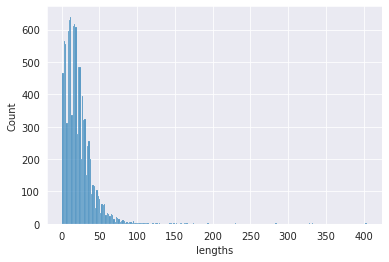

In [6]:
# distribuicão dos comprimentos das sentencas
sns.histplot(reli[reli.review.isin(reviews)]['lengths'])
plt.plot()

[]

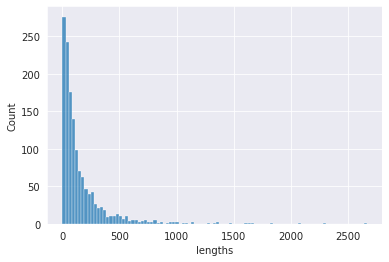

In [7]:
# distribuicão dos comprimentos das reviews
sns.histplot(reli_reviews[reli_reviews.review.isin(reviews)]['lengths'])
plt.plot()

In [8]:
# estatísticas a nível de sentencas
reli[reli.review.isin(reviews)].describe()

,review,sentence,total_aspects,has_aspect,fold,lengths
count,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000
mean,760.995710,5254.200782,0.188674,0.161789,5.507007,21.841739
std,447.610816,3032.680202,0.470285,0.368274,2.745042,18.200021
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,358.000000,2628.000000,0.000000,0.000000,3.000000,10.000000
50%,722.000000,5254.000000,0.000000,0.000000,6.000000,18.000000
75%,1138.000000,7881.000000,0.000000,0.000000,8.000000,29.000000
max,1601.000000,10507.000000,5.000000,1.000000,10.000000,404.000000


In [9]:
# quantidade de sentencas maior do que 100 e maior do que 200 tokens
reli[reli.lengths > 100].shape[0], reli[reli.lengths > 200].shape[0]

(47, 5)

- São 10.507 sentencas, porém, 10.489 são sentencas que pertecem a reviews que possui mais do que um token no total.
- 1.601 reviews, porém, 1.417 possui mais do que 1 token.
- Apenas 16.18% das sentencas possuem aspectos.
- Em média, as sentencas possui aproximadamente 22 aspectos.
- 75% das sentencas possuem até 29 tokens.
- A sentenca com maior comprimento, possui 404.
- 47 sentencas possui mais do que 100 tokens e 5 possui mais do que 200.

In [10]:
# estatísticas a nível de review
reli_reviews[reli_reviews.review.isin(reviews)].describe()

,review,total_aspects,lengths,has_aspect
count,1417.000000,1417.000000,1417.000000,1417.000000
mean,802.917431,1.396613,161.678193,0.633028
std,462.499839,1.685579,230.221898,0.482149
min,1.000000,0.000000,2.000000,0.000000
25%,405.000000,0.000000,38.000000,0.000000
50%,805.000000,1.000000,87.000000,1.000000
75%,1203.000000,2.000000,193.000000,1.000000
max,1601.000000,13.000000,2664.000000,1.000000


In [11]:
# reviews com mais do que 100, 200 e 1000 tokens
reli_reviews[reli_reviews.review.isin(reviews) & (reli_reviews.lengths > 100)].shape[0], reli_reviews[reli_reviews.review.isin(reviews) & (reli_reviews.lengths > 200)].shape[0], \
    reli_reviews[reli_reviews.review.isin(reviews) & (reli_reviews.lengths > 1000)].shape[0]

(635, 337, 18)

- Das 1.417 reviews, 63.3% possuem pelo menos 1 aspecto.
- Em média, as reviews possuem aproximadamente 162 aspectos.
- 75% das reviews possuem até 193 aspectos.
- 635 reviews possui mais do que 100 tokens, 337 possui mais do que 200, e 18 possui mais do que 1.000.

In [12]:
# total de reviews por particão e total de aspectos por particão
summary = reli[reli.review.isin(reviews)].groupby(['fold']).agg({'review': 'nunique', 'total_aspects': 'sum'}).reset_index()
summary

,fold,review,total_aspects
0,1,141,197
1,2,143,198
2,3,142,198
3,4,138,198
4,5,142,198
5,6,144,198
6,7,141,198
7,8,142,198
8,9,141,198
9,10,143,198


In [13]:
# mediana e o desvio absoluto da mediana
summary.total_aspects.median(), median_abs_deviation(summary.total_aspects)

(198.0, 0.0)